In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

$$b=\begin{cases} \theta_e + \left( R_{vd}\frac{c_p\theta_0}{L_v}-1 \right) q_t \ \ \ \ \ \ \ \ \ \text{if} q_t \lt q_vs, \ b_u \\
\theta_e + \left( R_{vd}\frac{c_p\theta_0}{L_v}-1\right) q_{vs} -  \frac{c_p\theta_0}{L_v}(q_t-q_{vs})\ \  \text{if} q_t \geq q_vs, \ b_s 
\end{cases}  (2.26)$$

$$N_u^2 = \frac{g}{\theta_0}\frac{d\tilde{\theta}}{dz}   (2.29)$$
$$N_u^2 = \frac{g}{\theta_0}\frac{d\tilde{\theta_e}}{dz}$$

$$ \frac{c_p \theta_0}{L_v} \approx 0.1 \to \theta_0 = 250K$$
$$d\tilde{\theta}/dz=3K/km, d\tilde{q_v}/dz=-0.6g/kg/km, N_u^2\approx 2N_s^2$$

identify the dependent variables: <br>
w bu bs qt theta_e

dependent: w bu bs qt theta_e
independent: nt dt qvs nu ns cp lv epsi theta

$$\frac{dw}{dt}=b=N_ub_uH_u + N_sb_sH_s$$
$$\frac{db_u}{dt}=-N_uw$$
$$\frac{db_s}{dt}=-N_sw$$
$$b = H_ub_u + H_sb_s$$
$$H_u = \begin{cases} 1 \ \ \text{if} q_t \lt q_vs, \\
0 \ \  \text{if} q_t \geq q_vs
\end{cases}  (2.50)$$
$$b_u = \theta_e + (\epsilon - 1)q_t$$
$$b_s = \theta_e + (\epsilon - 1)q_{vs} - \epsilon(q_t-q_{vs}) \ \ \ \ (2.51)$$
$$\theta + Lv/Cp min(qt, qvs)= \theta_e \ \ \ \ (2.13)$$

In [59]:
nt = 50000
w = np.zeros(nt)
bu = np.zeros(nt)
bs = np.zeros(nt)
dt = 0.1
Nu = 0.012      # Holton pp 58
Ns = 0.0012

w[0] = 0.1
bu[0] = 0
bs[0] = 1


# leap frog
for t in range(1):
    if bs[t] > bu[t]:
        w[t+1] = w[t] + bs[t]*dt
    else:
        w[t+1] = w[t] + bu[t]*dt
    
    bu[t+1] = bu[t] - (Nu**2)*w[t]*dt
    bs[t+1] = bs[t] - (Ns**2)*w[t]*dt
    


for t in range(1,nt-1):
    if bs[t] > bu[t]:
        w[t+1] = w[t-1] + bs[t]*2.*dt
    else:
        w[t+1] = w[t-1] + bu[t]*2.*dt
    
    bu[t+1] = bu[t-1] - (Nu**2)*w[t]*2.*dt
    bs[t+1] = bs[t-1] - (Ns**2)*w[t]*2.*dt
    
M = bu[0]/Nu**2 - bs[0]/Ns**2

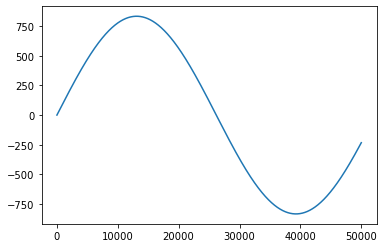

In [60]:
plt.plot(w)

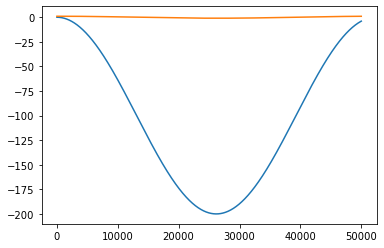

In [61]:
plt.plot(bu, label='bu')
plt.plot(bs, label='bs')

### TLM

In [62]:
# basic state?
w = np.zeros(nt)
bu = np.zeros(nt)
bs = np.zeros(nt)

# p for prime, perturbation
wp = np.zeros(nt)
bup = np.zeros(nt)
bsp = np.zeros(nt)

# initial condition for basic state
#w[0] = 0.1
#bu[0] = 0
#bs[0] = 0

# initial condition for perturbaitons are all zeros, 
#wp[0] = 1e-4
#bup[0] = 1e-5
#bsp[0] = 1e-6

# initial condition for basic state
w[0] = 0.1
bu[0] = 0
bs[0] = 0

# initial condition for perturbaitons are all zeros, 
wp[0] = 0.1
bup[0] = 0
bsp[0] = 0.1

# leap frog
for t in range(1):
    if bs[t] > bu[t]:
        wp[t+1] = wp[t] + dt*bup[t]
        w[t+1] = w[t] + bs[t]*dt
    else:
        wp[t+1] = wp[t] + dt*bsp[t]
        w[t+1] = w[t] + bu[t]*dt
        
    bup[t+1] = bup[t] - (Nu**2)*wp[t]*dt
    bu[t+1] = bu[t] - (Nu**2)*w[t]*dt
    bsp[t+1] = bsp[t] - (Ns**2)*wp[t]*dt
    bs[t+1] = bs[t] - (Ns**2)*w[t]*dt
    


for t in range(1,nt-1):
    if bs[t] > bu[t]:
        w[t+1] = w[t-1] + bs[t]*2.*dt
        wp[t+1] = wp[t-1] + bsp[t]*2.*dt
    else:
        w[t+1] = w[t-1] + bu[t]*2.*dt
        wp[t+1] = wp[t-1] + bup[t]*2.*dt
    
    bu[t+1] = bu[t-1] - (Nu**2)*w[t]*2.*dt
    bup[t+1] = bup[t-1] - (Nu**2)*wp[t]*2.*dt
    bs[t+1] = bs[t-1] - (Ns**2)*w[t]*2.*dt
    bsp[t+1] = bsp[t-1] - (Ns**2)*wp[t]*2.*dt
tlm_pert = [wp, bup, bsp]


In [29]:
def sens_subplots(var, ax, title):
    cs = ax.plot(var)
    ax.set_title(title)

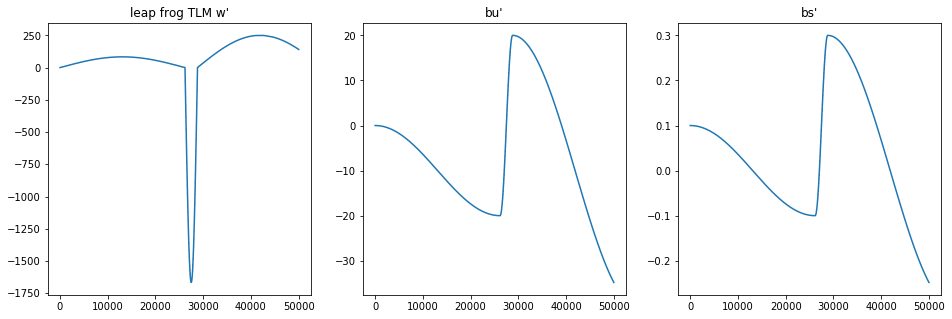

In [63]:
nrows = 1
ncols = 3
fig,ax = plt.subplots(nrows=nrows,
                      ncols=ncols, figsize=(16,5))
sens_subplots(wp, ax[0], "leap frog TLM w'")
sens_subplots(bup, ax[1], "bu'")
sens_subplots(bsp, ax[2], "bs'")

In [64]:
wp[-1], bup[-1], bsp[-1]

(140.52780851060803, -34.81050434906057, -0.24810504349060847)

In [89]:
a = pd.read_csv('/home1/class/fall17/nchen67/moistPV/fortran_moist_leapfrog/fort.16', delim_whitespace=True, 
                header=None, names=['a_w', 'a_bu', 'a_bs'])
a_w = a.a_w.values[::-1]
a_bu = a.a_bu.values[::-1]
a_bs = a.a_bs.values[::-1]

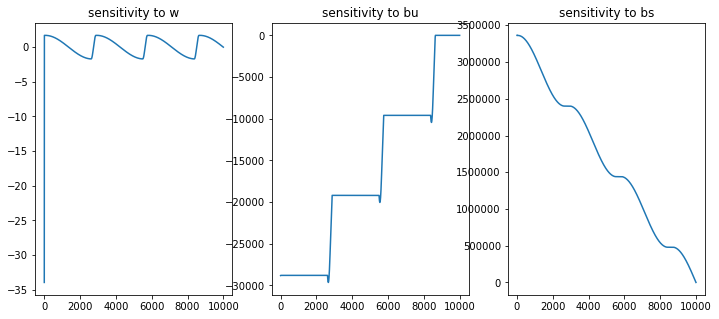

In [97]:
nrows = 1
ncols = 3
fig,ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,5))
sk = 10
sens_subplots(a_w[::sk], ax[0], 'sensitivity to w')
sens_subplots(a_bu[::sk], ax[1], 'sensitivity to bu')
sens_subplots(a_bs[::sk], ax[2], 'sensitivity to bs')

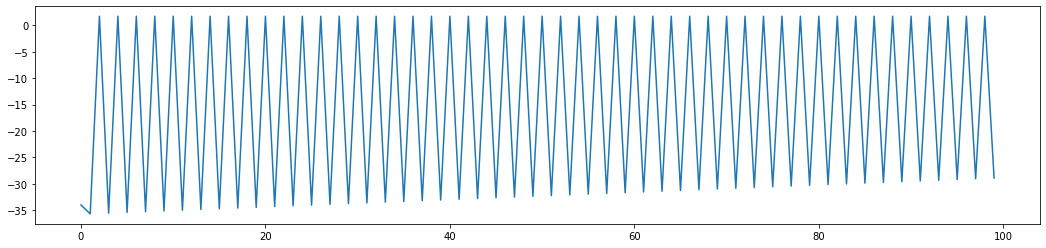

In [108]:
plt.figure(figsize=(18,4))
sk=1
plt.plot(a_w[0:100:sk])

In [91]:
a = pd.read_csv('/home1/class/fall17/nchen67/moistPV/fortran_moist_leapfrog/fort.15', delim_whitespace=True, 
                header=None, names=['w_prime', 'bu_prime', 'bs_prime'])
w_prime = a.w_prime
bu_prime = a.bu_prime
bs_prime = a.bs_prime

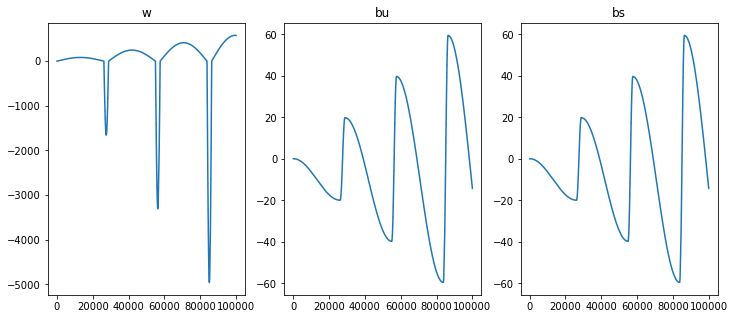

In [92]:
nrows = 1
ncols = 3
fig,ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,5))
sens_subplots(w_prime, ax[0], 'w')
sens_subplots(bu_prime, ax[1], 'bu')
sens_subplots(bu_prime, ax[2], 'bs')

In [93]:
w_prime.size, a_w.size

(99999, 100000)

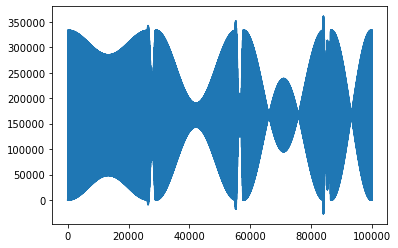

In [94]:
dR = w_prime*a_w[1:] + bu_prime*a_bu[1:] + bs_prime*a_bs[1:]
plt.plot(dR)
